Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week 9 - Clustering

For this assignment, you will use the *digits* dataset.

The components of this assignment are:
1. Load the digits dataset into a Pandas data frame.
1. Preprocess the digits dataset.
1. Examine how many clusters you may need using the elbow method.
1. Cluster the digits dataset using K-means and evaluate using adjusted rand index.
1. Optional: See how the ARI changes as you alter the K-means parameters.
1. Optional: Use clustering as a classifier and compare to Random Forest.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Task 1. Load the digits dataset into a Pandas data frame.

The digits dataset represents images of handwritten digits. Each image is a 32x32 bitmap. To create a numerical dataset representing the images, each image was divided into non-overlapping blocks of 4x4, and the number of set pixels in each block is counted.

Thus, each image is represented by an 8x8 matrix of integers in the range 0-16. Each sample in the dataset therefore has 64 attributes. There are a total of 1,797 samples in the dataset we will use.

Therefore, the digits dataset should be loaded into a Pandas dataframe with 1,797 rows and 64 columns.

In this task, you will load the digits dataset (http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes) into a Pandas dataframe. Note that the final column in this dataset is the correct label (an integer in the range 0-9).

Load the attributes into a Pandas dataframe named **digits**. This dataframe should *not* include the final column, as we only want to load the features here.

Instead, save the final column into a Pandas series named **labels**.

In [200]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"
data = pd.read_csv(url, sep = ",", header = None)
digits = data.iloc[:, :-1]
labels = data.iloc[:, -1]

In [201]:
assert digits.shape == (1797, 64)
assert labels.shape == (1797,)
assert digits.sum().sum() == 561718
assert all((0 <= labels) & (labels <= 9))

## Task 2. Preprocess the digits dataset.

Standardize the data so that each column has a mean of (or very close to) zero and a standard deviation of (or very close to) 1. Make sure the resulting data is a Pandas dataframe (if it is not, convert it to one using pd.DataFrame).

Note that some of the columns are all zeros across all samples. In this case, you can leave the column as is. In theory you could remove those columns as they do not contribute any information to clustering, but in our case they do not affect the results so we will keep them. For this reason, our assertions makes sure that all the columns have a standard variation of one **except** those columns that are all zeros.

In [202]:
from sklearn.preprocessing import scale
digits = pd.DataFrame(scale(digits))

In [203]:
assert digits.shape == (1797, 64)
assert all(np.isclose(digits.mean(), 0))
assert all(np.isclose(digits.std(ddof=0), 1) == (digits.sum() != 0))
assert np.isclose(digits.sum().sum(), 0)

## Task 3. Examine how many clusters you may need using the elbow method.

The K-means algorithm requires us to specify the number of clusters. One way to assess this is using the elbow method.

Use the elbow method and see if there is a clear number of clusters that make sense in the digits dataset. Note that this is just for exploratory purposes; we know the number of clusters should be 10, and that is what we will use in the future components of this exercise.

The elbow method consists of visualizing the sum of squared distances between samples and their closest cluster center. This is done by creating a scatter plot where the number of clusters used in K-means is provided on the X axis and the sum of squared distances is provided on the Y axis. If there is a clear inflection point, that can be an indicator of the ideal number of clusters.

Run the K-means algorithm on the digits dataset 25 times. In the first run set the number of clusters to 1, in the second to 2, and so on through 25. For each run, collect the sum of squared distances. Save these into a list named **ssds**.

Create an elbow plot and examine whether you can see a clear inflection point.

**Note:**
In order for our assertions to work, make sure you use the default parameters for KMeans, with the exception of random_state, which you should set to 126, i.e. to run with one cluster:
```python
KMeans(n_clusters=1, random_state=126)
```

and so forth.

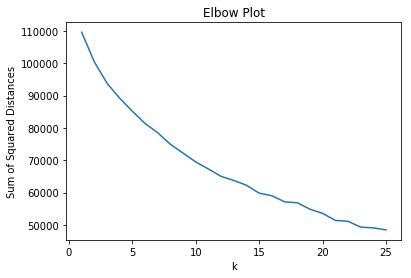

In [204]:
from sklearn.cluster import KMeans

def elbow_plot(data, max_clusters):
    """Elbow plot for k means clustering"""

    ssds = [] 
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters = i, random_state = 126)
        km.fit(data)
        ssds.append(km.inertia_) # Sum of squared distances of samples to their closest cluster center.

    plt.plot(range(1, max_clusters + 1), ssds)
    plt.title("Elbow Plot")
    plt.xlabel("k")
    plt.ylabel("Sum of Squared Distances")
    
    return ssds

ssds = elbow_plot(digits, 25)

In [165]:
assert len(ssds) == 25
assert np.isclose(np.mean(ssds), 68158.8514102)

## Task 4. Cluster the digits dataset using K-means and evaluate using adjusted rand index.

Go ahead and cluster the dataset using K-means. 

Set the number of clusters to ten and and the random_state to 126:
```python
KMeans(n_clusters=10, random_state=126)
```

Evaluate your clusters using the ARI. You can import the ARI function from sklearn.metrics:

```python
from sklearn.metrics import adjusted_rand_score
```

Save the ARI to the variable *score*. Save the KMeans model to the variable *model*.

From http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html:

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

In [166]:
from sklearn.metrics import adjusted_rand_score

model = KMeans(n_clusters = 10, random_state = 126)
predicted_clusters = model.fit_predict(digits)
score = adjusted_rand_score(labels, predicted_clusters)

In [167]:
assert isinstance(score, float)
assert np.isclose(score, 0.477717062354)
assert len(model.labels_) == 1797
assert sum(model.labels_) == 5881

## Task 5. How does the ARI change when you alter the K-means parameters?
### Optional and ungraded.

Explore the effect on the ARI of changing the KMeans parameters, such as: init, n_init, max_iter.

Compare to other evaluations, such as: homogeneity score, completeness score, and the silhouette coefficient.

<function matplotlib.pyplot.show>

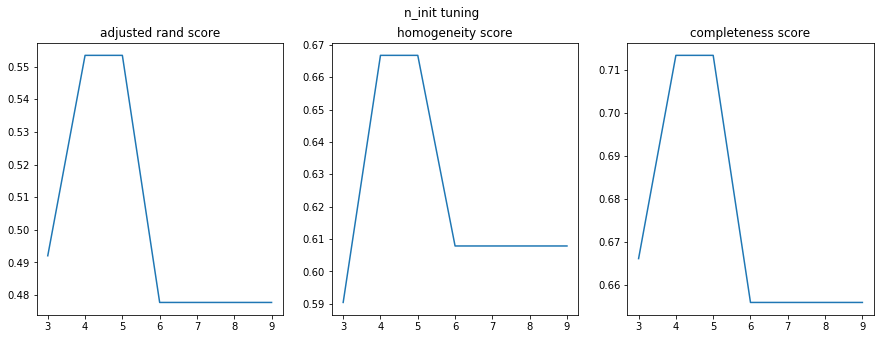

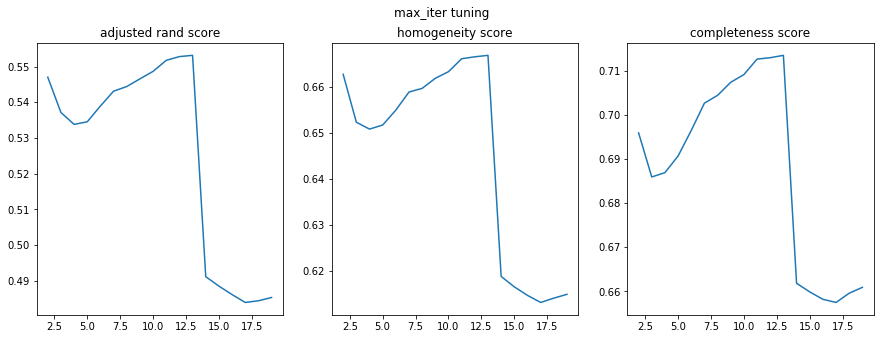

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score # A clustering result satisfies homogeneity 
# if all of its clusters contain only data points which are members of a single class.
from sklearn.metrics.cluster import completeness_score # A clustering result satisfies completeness 
# if all the data points that are members of a given class are elements of the same cluster.

ars = []
hs = []
cs = []

for i in range(3, 10):
    model = KMeans(n_clusters = 10, n_init = i, random_state = 126)
    predicted_clusters = model.fit_predict(digits)
    ars.append(adjusted_rand_score(labels, predicted_clusters))
    hs.append(homogeneity_score(labels, predicted_clusters))
    cs.append(completeness_score(labels, predicted_clusters))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5))
x_ax = range(3, 10)
fig.suptitle("n_init tuning")
ax1.plot(x_ax, ars)
ax2.plot(x_ax, hs)
ax3.plot(x_ax, cs)
ax1.set_title("adjusted rand score")
ax2.set_title("homogeneity score")
ax3.set_title("completeness score")
plt.show

ars = []
hs = []
cs = []
    
for i in range(2, 20):    
    model = KMeans(n_clusters = 10, max_iter = i, random_state = 126)
    predicted_clusters = model.fit_predict(digits)
    ars.append(adjusted_rand_score(labels, predicted_clusters))
    hs.append(homogeneity_score(labels, predicted_clusters))
    cs.append(completeness_score(labels, predicted_clusters))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
x_ax = range(2, 20)
fig.suptitle("max_iter tuning")
ax1.plot(x_ax, ars)
ax2.plot(x_ax, hs)
ax3.plot(x_ax, cs)
ax1.set_title("adjusted rand score")
ax2.set_title("homogeneity score")
ax3.set_title("completeness score")
plt.show

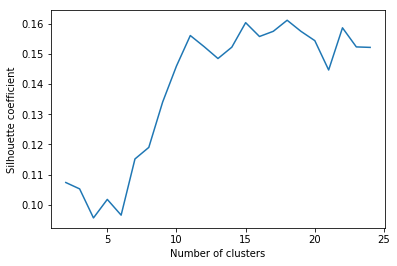

In [205]:
# Silhouette evaluation of kmeans

from sklearn.metrics.cluster import silhouette_score
import pprint

def silhouette_eval(data, n):
    """Calculate solhouette coefficient for kmeans model"""    
    km = KMeans(n_clusters = n)
    km.fit_predict(data)
    score = silhouette_score(data, km.labels_)
    return score

scores = {n: silhouette_eval(digits, n) for n in range(2, 25)}
# pprint.pprint(scores)
plt.plot(list(scores.keys()), list(scores.values()))

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

## Task 6. Clustering as a classifier?
### Optional and ungraded.

Can you use clustering as a classifier for the digits dataset? How does it compare to some of the classifiers you used last week, such as random forest?

In [ ]:
# sometime I will do this but not now